In [2]:
import pandas as pd

In [30]:
data = pd.read_csv("Employee2.csv")

In [31]:
data.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
Salary                       0
dtype: int64

In [6]:
#No missing values in datasets.We handle them using fillna(), ffill(), bfill() methods.

#How can we find and describe an open-source dataset from a platform like Kaggle or UCI Machine Learning Repository?

In [9]:
# Ans. You can find datasets by going to Kaggle Datasets. You can search for a specific dataset, read its description, and download it.

#How can we load the dataset from a CSV file into a Pandas DataFrame?

In [12]:
#Ans. You can load a CSV file into a Pandas DataFrame using the read_csv() function:
#import pandas as pd

# Load the dataset from a CSV file
#df = pd.read_csv('path_to_file.csv')

#Are there duplicate employee records, and how can we remove them?

In [33]:
#Ans. You can check for duplicate records using the duplicated() method,which returns a Boolean series indicating 
#whether each row is a duplicate:
duplicates = data.duplicated()
print(duplicates.sum())

#df.drop_duplicates(inplace=True) removes duplicate values

0


#How can we identify missing values in the dataset and summarize it using describe()?

In [34]:
missing_values = data.isna().sum()
print(missing_values)

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
Salary                       0
dtype: int64


In [35]:
data.describe()


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Salary
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864,75445.019557
std,1.863377,0.561435,4.826087,1.558240,0.475047,25879.151531
min,2012.000000,1.000000,22.000000,0.000000,0.000000,30044.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000,52958.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000,75496.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000,97608.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000,119976.000000


#What is the dimension (number of rows and columns) of the dataset? What are the data types of the variables?

In [36]:
#Ans. 
data.shape

(4653, 10)

In [37]:
#To inspect the first few rows and understand what data you have, you can use:
data.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Salary
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,62439
1,Bachelors,2013,Pune,1,28,Female,No,3,1,106995
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,103760
3,Masters,2016,Bangalore,3,27,Male,No,5,1,105078
4,Masters,2017,Pune,3,24,Male,Yes,2,1,40411


In [26]:
#To check the data types of the variables (columns) in a dataset, you can use the dtypes attribute in Pandas:
data.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [41]:
#How can we calculate the average salary for each education type?

In [40]:
average_salary_by_education = data.groupby('Education')['Salary'].mean()
print(average_salary_by_education)

Education
Bachelors    75562.544571
Masters      74431.824742
PHD          78022.178771
Name: Salary, dtype: float64


#How can we filter employees who has experience more than 3 years?

In [43]:
filtered_data = data[data['ExperienceInCurrentDomain'] > 3]

# Display the filtered DataFrame
print(filtered_data)

      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
3       Masters         2016  Bangalore            3   27    Male          No   
10      Masters         2012  Bangalore            3   27    Male          No   
12    Bachelors         2018       Pune            3   32    Male         Yes   
14    Bachelors         2012  Bangalore            3   37    Male          No   
17    Bachelors         2014       Pune            3   34    Male          No   
...         ...          ...        ...          ...  ...     ...         ...   
4642  Bachelors         2012  Bangalore            3   36  Female          No   
4643  Bachelors         2013  Bangalore            3   31  Female          No   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDo

#How can we visualize relationships between variables using Seaborn (e.g., salary distribution, gender ratio)?

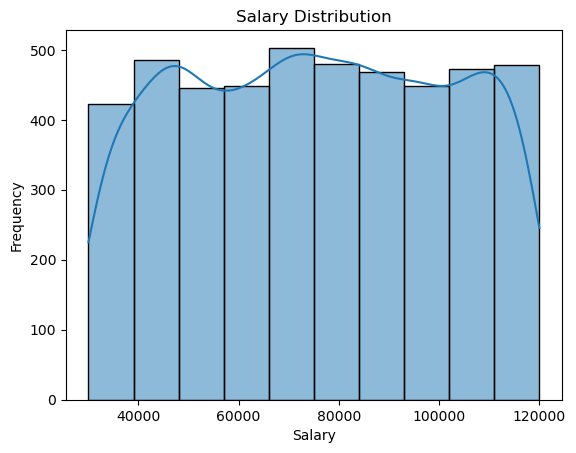

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Salary'], kde=True, bins=10)  # kde=True adds a kernel density estimate
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

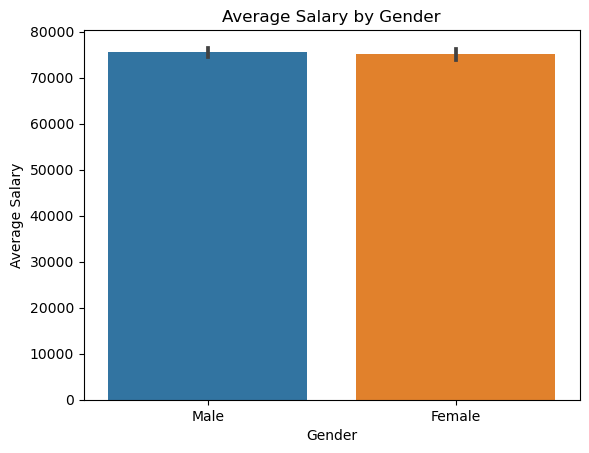

In [47]:
sns.barplot(x='Gender', y='Salary', data=data)
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()

C:\Users\admin\Anaconda5\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


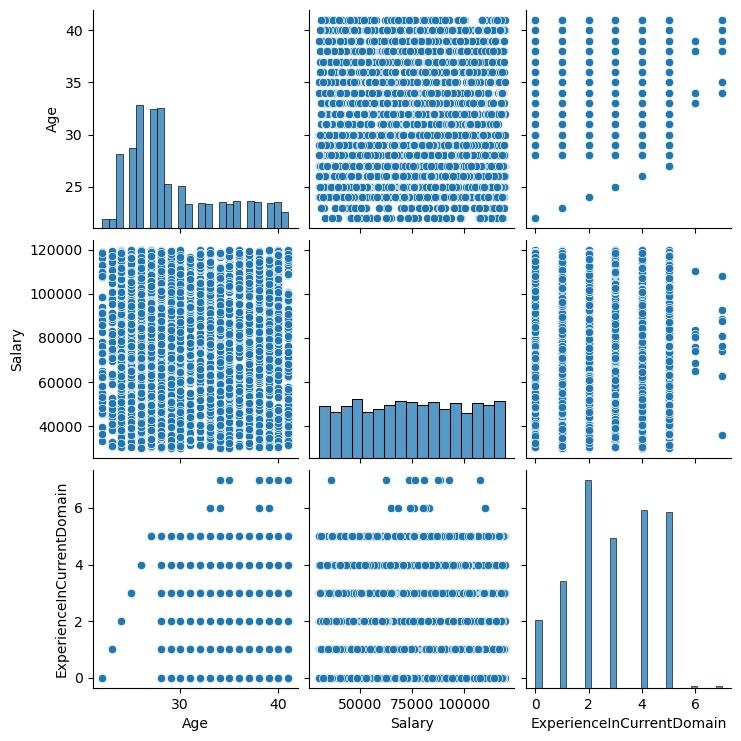

In [48]:
sns.pairplot(data[['Age', 'Salary', 'ExperienceInCurrentDomain']])
plt.show()

#Create a graph representing names of cities and no. of employess in particualr cities.

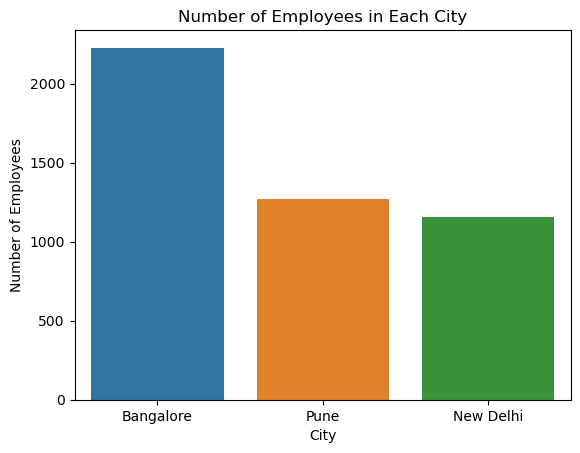

In [51]:
city_counts = data['City'].value_counts()

# Create a bar plot to represent the number of employees per city
sns.barplot(x=city_counts.index, y=city_counts.values)

# Add labels and title
plt.title('Number of Employees in Each City')
plt.xlabel('City')
plt.ylabel('Number of Employees')

# Display the plot
plt.show()